<a href="https://colab.research.google.com/github/ephetpv/proyecto_python/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Sobrevivientes del Titanic__



---

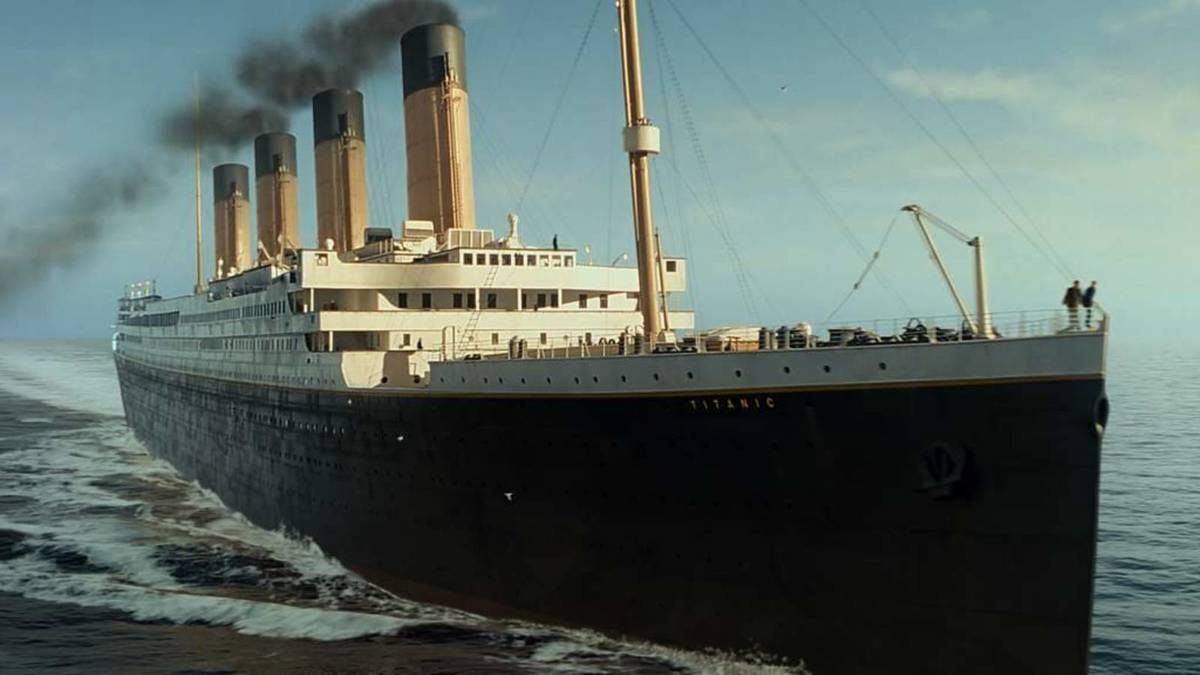
<br>


## Identificación del Problema
* ¿Qué problema identificaron? 

Alta mortalidad en el hundimiento del Titanic.
Problema de clasismo influenció en el número de sobrevivientes en el hundimiento del Titanic.

* ¿Qué investigaron sobre el tema? 

En el Titanic había aproximadamente (no se sabe el número exacto) 2224 personas entre pasajeros y gente de la tripulación, de las cuales solo aproximadamente (tampoco se tiene el número exacto) 720 sobrevivieron, a pesar de que el crucero contaba con suficientes barcos salvavidas como para que 1178 personas pudieran sobrevivir. Además, la mayoria de la gente que sobrevivió tenian ciertas características en común, principalmente sexo y clase, especificamente una mayor proporción de mujeres y gente de primera clase sobrevivió comparado con otras categorías.

* ¿Qué soluciones se han intentado/hecho anteriormente para intentar entender/resolver el problema?<br>

Se han realizado diferentes modelos de machine learning, tales como modelos de clasificación, para identificar qué variables de cada uno de los registros, equivalentes a una persona a bordo del Titanic, fueron las que tuvieron más peso en determinar si sobrevivían o no.



---

## Planteamiento de preguntas clave
Plantea una serie de preguntas sobre el problema que te interesa y debate con tus compañeros y la experta si son las mejores preguntas que se pueden hacer para resolver el problema, o si son preguntas que es posible responder.

* ¿Sobrevivieron más mujeres u hombres?
* ¿Qué clase tuvo un mayor índice de supervivencia?
* ¿Cuáles fueron los rangos de edades donde más personas sobrevivieron?
* ¿Qué variable tuvo mayor influencia en la supervivencia de la persona?
* De acuerdo a la variable clase ¿Se puede afirmar que hubo desigualdad en el número de supervivientes de acuerdo a la clase 


---

 
## Colección de Datos

Se obtuvo la base de datos de https://www.kaggle.com, la cual es una página muy popular para obtener bases de datos con las cuales trabajar.

---

## Análisis Exploratorio de Datos

In [2]:
# Se cargan las librerías que se ocuparán

# linear algebra
import numpy as np
# data processing
import pandas as pd
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
# algoritmo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import warnings
 
warnings.filterwarnings('ignore')

In [3]:
# Se leen los archivos csv utilizando los paths de Github de nuestro repositorio
# donde se guardaron después de descargarlos de Kaggle. 

path_train = 'https://raw.githubusercontent.com/ephetpv/Titanic/main/data/train.csv'
path_test = 'https://raw.githubusercontent.com/ephetpv/Titanic/main/data/test.csv'
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

#### Diccionario de datos

| Variable | Descripción |
|:---:|:---:|
|Survived|Supervivencia|
|Pclass|Clase de ticket|
|Sex|Sexo|
|Age|Edad en años|
|Sibsp|# de herman@s/espos@s a bordo|
|Parch|# de papás/hij@s a bordo|
|Ticket|Número de ticket|
|Fare|Tarifa de pasajero|
|Cabin| Número de cabina|
|Embarked|Puerto de embarque|

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

>Se renombran las columnas para mejor comprensión de las variables:



In [5]:
# Es importante recordar que el dataset test no tiene la feature survived.

train.columns=['passenger_id','survived', 'p_class', 'name', 'sex', 'age', 'sib_sp', 'par_ch',
       'ticket', 'fare', 'cabin', 'embarked']
test.columns=['passenger_id', 'p_class', 'name', 'sex', 'age', 'sib_sp', 'par_ch', 'ticket', 'fare', 'cabin', 'embarked']

In [6]:
train.head(3)

,passenger_id,survived,p_class,name,sex,age,sib_sp,par_ch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
test.head(3)

,passenger_id,p_class,name,sex,age,sib_sp,par_ch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   p_class       891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sib_sp        891 non-null    int64  
 7   par_ch        891 non-null    int64  
 8   ticket        891 non-null    object 
 9   fare          891 non-null    float64
 10  cabin         204 non-null    object 
 11  embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


El dataset de train tiene 891 registros y 12 campos.

Las columnas que tienen valores faltantes son age, cabin y embarked. Cabin tiene muchos valores faltantes y no aportaría demasiado a nuestro análisis hasta este momento. Embarked solo tiene dos valores faltantes que pueden ser sustituidos por el puerto más común (moda).

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  418 non-null    int64  
 1   p_class       418 non-null    int64  
 2   name          418 non-null    object 
 3   sex           418 non-null    object 
 4   age           332 non-null    float64
 5   sib_sp        418 non-null    int64  
 6   par_ch        418 non-null    int64  
 7   ticket        418 non-null    object 
 8   fare          417 non-null    float64
 9   cabin         91 non-null     object 
 10  embarked      418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


El dataset de test tiene 418 registros y 11 campos.

Las columnas que tienen valores faltantes son age, fare y cabin. Así como el dataset de train, cabin tiene muchos valores faltantes y se optaría por descartarla si no se encuentra información útil en el EDA. Fare solo tiene un valor faltante que puede ser sustituido por el promedio o mediana de la misma.

#### Análisis de train

> Para una mejor visualización de los datos faltantes por campo de la base train se calcula el porcentaje que estos representan:


In [10]:
# Se calcula el promedio de datos faltantes (NaN)

total = train.isna().sum().sort_values(ascending = False)
porcentajes = train.isna().sum()/train.isna().count()*100

In [11]:
def to_percent(valor):
    return f'{valor:.2f}%'

In [12]:
data_faltante = pd.concat([total,porcentajes.map(to_percent)], axis = 1, keys = ['Total','Porcentaje'])
data_faltante.head(4)

,Total,Porcentaje
cabin,687,77.10%
age,177,19.87%
embarked,2,0.22%
fare,0,0.00%


In [13]:
train['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Como se mencionó anteriormente, cabin tiene menos del 23% de datos. Se observa que tienen una letra asociedad e indica la puerta donde abordaron. Posteriormente, se hará la división en una columna independiente.  

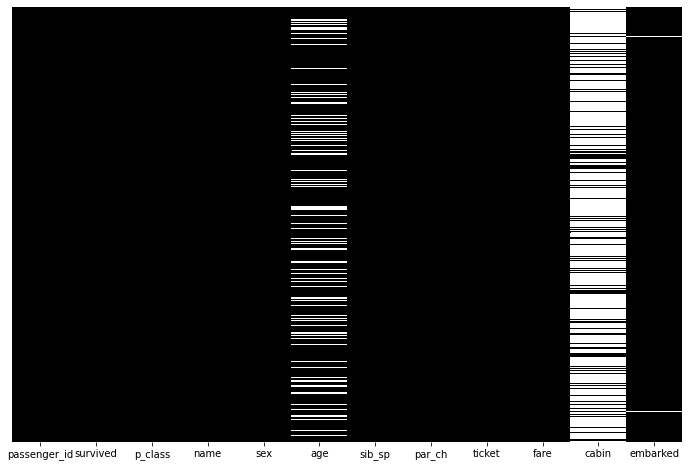

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isna(), yticklabels=False, 
           cbar=False, cmap='Greys_r')

En el gráfico anterior las líneas blancas representan datos nulos o faltantes en la base de datos de train, como se puede observar y como ya se vió con anterioridad, sólo las variables age, cabin y embarked tienen datos nulos. Siendo cabin la variable con más datos nulos.

Se tiene la siguiente matriz de coeficientes de correlación de Pearson:

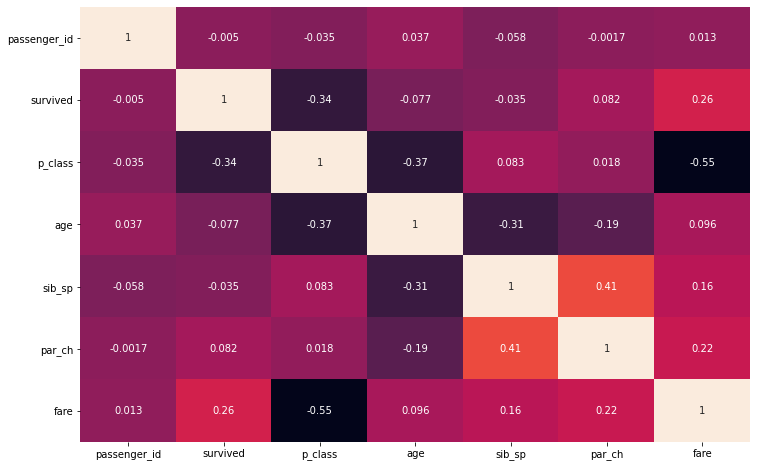

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(method='pearson'), annot=True, cbar=False)

La correlación es una medida que toma valores entre -1 y 1 que indica la relación lineal entre 2 variables. Entre más cercana al 0, menor es la relación entre las variables, es por ello que la diagonal es de unos, ya que 1 variable es totalmente dependiente de si misma. Entre mayor sea la correlación, más obscuro sera el color del recuadro.

Por ahora nos interesa la correlación entre la variable survived y las demás variables, se observa que las variables p_class y fare son las únicas que tienen una correlación significativa. En el caso de p_class se tiene que la correlación es de -0.34, esto indica una relación inversamente proporcional con la variable survived, es decir cuando survived aumenta (0 a 1) p_class disminuye, esto se puede interpretar como que la gente que pertenecia a las primeras clases tenian mayor probabilidad de sobrevivir. La variable fare tiene una correlación de 0.26, en este caso la relación es directamente proporcional, interpretandose como que la probabilidad de sobrevivir es mayor entre más grande sea el valor de fare. 

Así se pudiera responder la pregunta de ¿Qué variable tuvo mayor influencia en la supervivencia de la persona?

Según la matriz de correlaciones la clase fue la variable con mayor influencia en la determinación de si la persona sobrevivía o no. Es importante mencionar que la correlación de Pearson sólo puede utilizarse cuando las variables son cuantitativas, es por ello que la variable sexo no figura en la matriz, por lo que aún no se puede descartar la variable sexo como la variable de mayor influencia.




In [16]:
train.nunique().sort_values(ascending = False)

name            891
passenger_id    891
ticket          681
fare            248
cabin           147
age              88
par_ch            7
sib_sp            7
embarked          3
p_class           3
sex               2
survived          2
dtype: int64

Arriba se puede observar los datos únicos de cada campo. Es normal que name y passenger_id tenga todos sus registros como datos únicos. Passenger_id solo es un identificador y no aporta al estudio de este dataset. A bordo del Titanic cada persona tenía asociado un título. Posteriormente se utilizará para llenar los NaN de age. 

Ticket es el tercer campo con más valores únicos. ¿El número de ticket influiría en la supervivencia de los tripulantes? Es muy poco probable, por lo que nos deshacernos de esta columna.

In [17]:
# Dejaremos la feature ticket de los dos datasets

train.drop('ticket', axis=1, inplace=True)
test.drop('ticket', axis=1, inplace=True)

In [18]:
train.describe()

,passenger_id,survived,p_class,age,sib_sp,par_ch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


En esta tabla hay varios datos interesantes. El primero y el que más nos interesa es que el 38% del conjunto de entrenamiento sobrevivió. Lo segunda es que la persona más pequeña a bordo era un bebé mientras la persona con más edad tenía 80 años. 

Es importante notar que la variable fare tiene una media de 32.20 y una mediana de 14.45, sin embargo el valor máximo asciende hasta 512.32, es decir para esta variable existen valores atipicos elevados. 

Al ser un dato ordinal (el orden tiene importancia ya que la primera clase tenía mayores privilegios), el promedio de p_class no es un estadístico apropiado. La mayoría de tripulantes tenía boletos de tercera clase.

En conclusión, los campos más relevantes para la supervivencia serían todos excepto el passenger_id que es únicamente un número identificador que no aporta al estudio, la cabina, el nombre y el número de ticket.

## Análisis por variable de train


#### survived

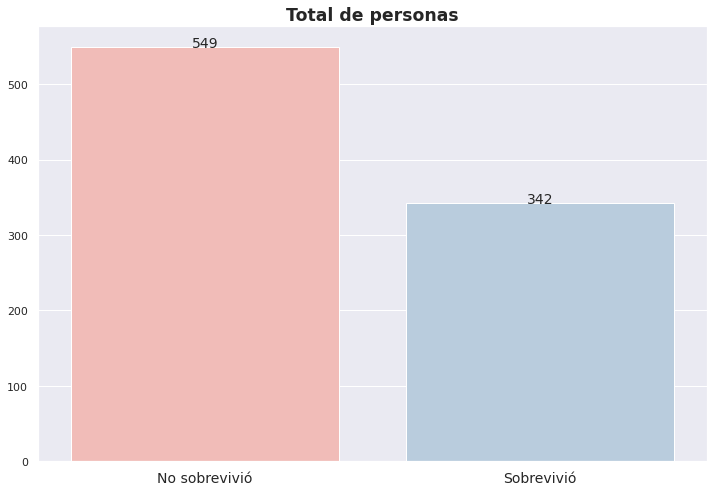

In [19]:
# Gráfica de feature survived

plt.figure(figsize=(12,8))
sns.set_theme(style='darkgrid')
g = sns.countplot(x='survived', data=train, palette='Pastel1')
#g.set_yticks([t*50 for t in range(0,13)])
g.set_xticklabels(['No sobrevivió','Sobrevivió'], size=14)
g.set_title('Total de personas', fontsize='x-large', fontweight='bold')
g.set_xlabel('') 
g.set_ylabel('')
 
for p in g.patches:
        g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

De las 891 personas que figuran dentro de la base de datos de train, 549 no sobrevivieron, mientras que 342 si lo hicieron. 

¿Es posible que esas 342 tuvieran características en común?

In [20]:
percent=train['survived'].sum()/len(train) * 100
print(f'Porcentaje de supervivencia: {percent:.1f}%')

Porcentaje de supervivencia: 38.4%


#### p_class

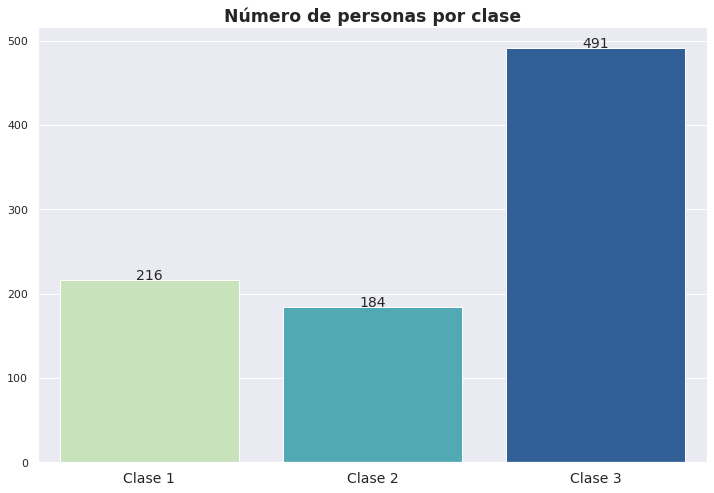

In [21]:
# Gráfica de feature p_class

plt.figure(figsize=(12,8))
g = sns.countplot(x='p_class', data=train, palette='YlGnBu')
g.set_title('Número de personas por clase', fontsize='x-large', fontweight='bold') 
g.set_xticklabels(['Clase 1','Clase 2','Clase 3'], size=14) 
g.set(xlabel='', ylabel='' )
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

Más de la mitad de las y los pasajeros que estan en el dataset train pertenecían a la clase 3 mientras que la clase 2 era la clase con menos pasajeros y pasajeras.

[Text(0, 0, 'Clase 1'), Text(0, 0, 'Clase 2'), Text(0, 0, 'Clase 3')]

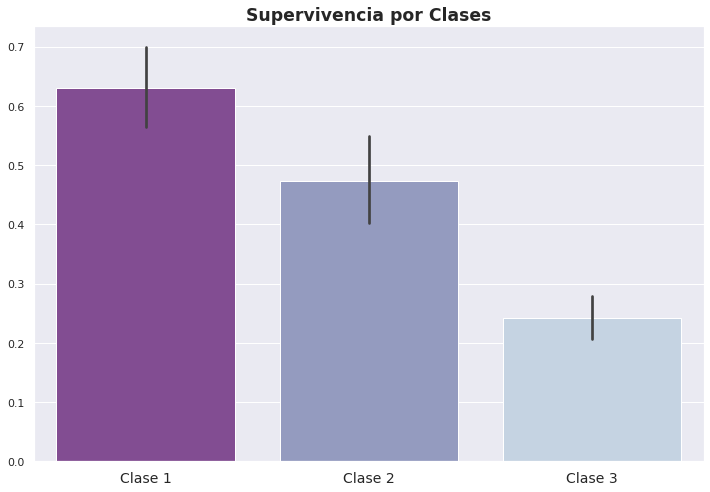

In [22]:
# Gráfica de supervivencia por clase

plt.figure(figsize=(12,8))
g = sns.barplot(x='p_class', y='survived', data=train, palette='BuPu_r')
g.set_title('Supervivencia por Clases', fontsize='x-large', fontweight='bold')
g.set(xlabel='',ylabel='')
g.set_xticklabels(['Clase 1','Clase 2','Clase 3'], size=14)

In [23]:
# Número de personar que sobrevivieron por clase
train.groupby('p_class')['survived'].sum()

p_class
1    136
2     87
3    119
Name: survived, dtype: int64

En el gráfico de barras se observa que la clase 1 tuvo la mayor proporción de sobrevivientes, seguida de la clase 2 y por último la clase 3. 

* ¿Qué clase tuvo un mayor índice de supervivencia?

La primera clase.
* De acuerdo a la variable clase ¿Se puede afirmar que hubo desigualdad en el número de supervivientes de acuerdo a la clase?

A simple vista se puede ver que le dieron prioridad a la gente de la primera y segunda clase. La clase con menos sobrevientes fue la segunda. Pero aunque parezca que el número de sobrevivientes fue parecido entre clases, no hay que olvidar que la clase con mayor porcentaje de personas que no sobrevivieron fue la 3.



#### sex

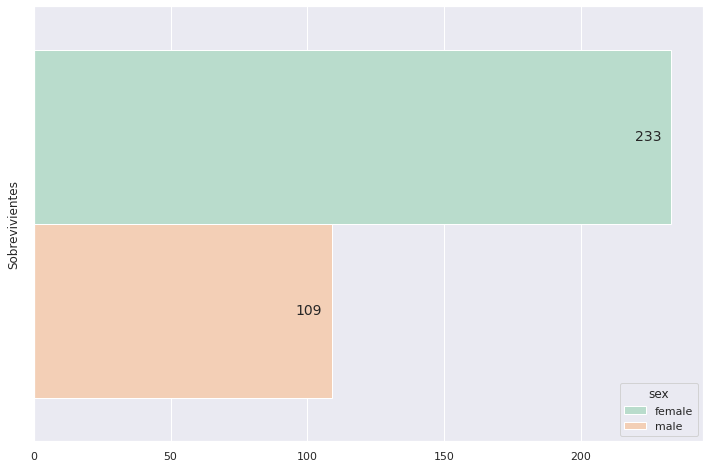

In [24]:
# Gráfico de feature sex

plt.figure(figsize=(12,8))
g = sns.countplot(y=train[train['survived']==1]['survived'], hue='sex', 
                  hue_order=['female','male'], data=train, palette='Pastel2')
g.set(xlabel=None,ylabel='Sobrevivientes')
g.set_yticklabels('')
for p in g.patches:
    g.annotate(int(p.get_width()),((p.get_x() + p.get_width()), p.get_y()), 
                xytext=(-10, -90),fontsize=14,textcoords='offset points', 
                horizontalalignment='right')

De las y los 342 sobrevivientes, 109 fueron hombres y 233 mujeres, lo cual indica que el sexo de la persona es una variable importante para determinar si la persona sobrevive o no. Respondiendo a la pregunta ¿Sobrevivieron más mujeres u hombres?

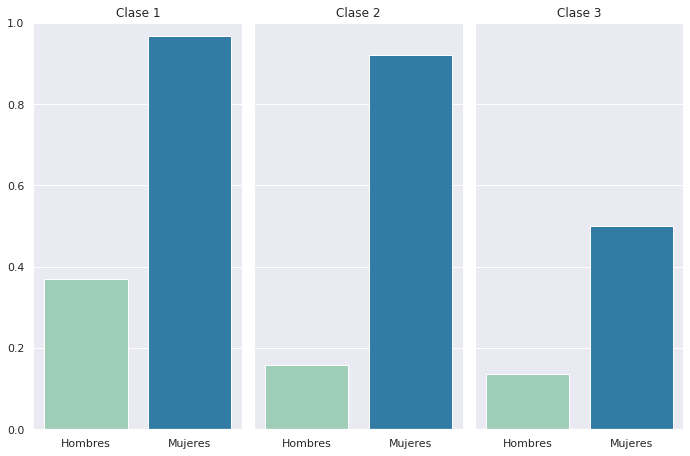

In [25]:
# Gráfico de supervivencia por clase dividido por género 

g = sns.catplot(x="sex", y="survived", col="p_class",
                 data=train,kind="bar", ci=None,
                 aspect=.5, height=6.5, palette='YlGnBu')
g.set(xlabel=None,ylabel=None)
g.set_xticklabels(["Hombres", "Mujeres"])
g.set_titles("Clase {col_name}")
g.set(ylim=(0, 1))
g.despine(left=True)

Entre la clase 1 y la 2, el porcentaje de mujeres que sobrevivieron esta por arriba del 90%. Si eras mujer y viajabas en primera o segunda clase era muy seguro que sobrevivieras.Por otro lado, en la clase 3 este desciende hasta el 50%. 

En la clase 2 y 3 el porcentaje de hombres que sobrevivieron está alrededor del 15% mientras que en la clase 1 este asciende hasta aproximadamente un 38%. De esta forma se reafirma que a la clase 1 se le dió prioridad tanto a mujeres y a hombres, sin embargo a las mujeres de la clase 3 se les dió más prioridad que a los hombres de la clase 1.

#### age

<Figure size 1008x576 with 0 Axes>

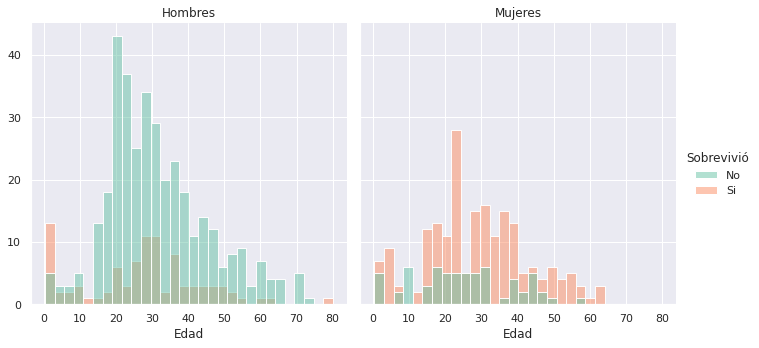

In [26]:
# Gráfico de feature age

plt.figure(figsize=(14,8))
g = sns.displot(train, x='age', col='sex', hue='survived', bins=30, palette='Set2')
g.set_axis_labels('Edad','')
axes = g.axes.flatten()
axes[0].set_title('Hombres')
axes[1].set_title('Mujeres')
g.legend.set_title('Sobrevivió')

new_labels = ['No', 'Si']
for t, l in zip(g.legend.texts, new_labels): t.set_text(l)

Para responder la pregunta: ¿cuáles fueron los rangos de edades donde más personas sobrevivieron?

En el caso de los hombres los rangos de edad con mayor probababilidad de supervivencia son de 0 a 13 años, 28 a 30 años y 80 años (ya que la única persona del Titanic de 80 años sobrevivió).

De las mujeres, a pesar de que varios rangos de edad tenían más del 50% de probabilidad de sobrevivir, sobresalen los rnagos de 13 a 23 años, 28 a 43 años  y 50 a 63 años aproximadamente, la única edad en la que no hubieron supervivientes fue en el rango de los 10 años.

#### sib_sp

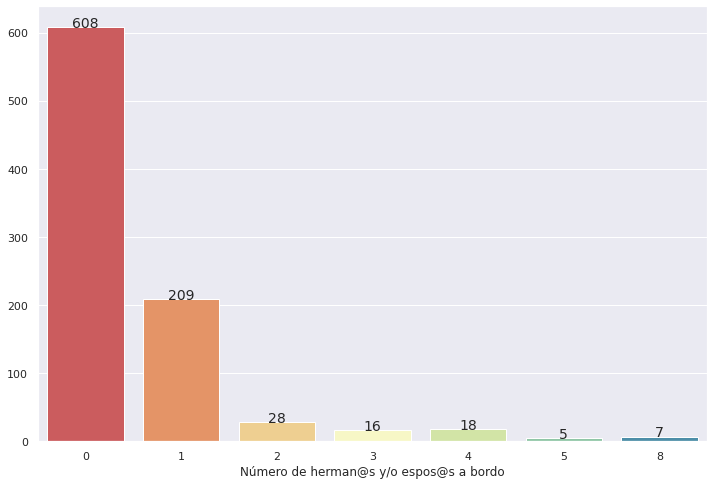

In [27]:
# Gráfico de feature sib_sp

plt.figure(figsize=(12,8))
g = sns.countplot(x = 'sib_sp', data=train, palette='Spectral')
g.set_xlabel('Número de herman@s y/o espos@s a bordo')
g.set_ylabel('')
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

La mayoria de la gente a bordo del Titanic iba sin hermanos o hermanas y/o parejas a bordo. La mayoría de los que tenían un familiar de estos a bordo solo viajaban con un herman@ o espos@.

Text(0, 0.5, '')

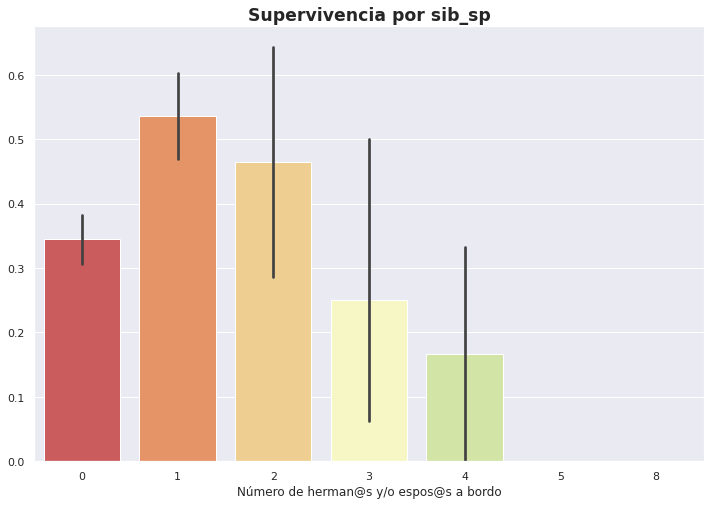

In [28]:
# Gráfico de supervivencia por sib_sp

plt.figure(figsize=(12,8))
g = sns.barplot(x='sib_sp', y='survived', data=train, palette='Spectral')
g.set_title('Supervivencia por sib_sp',fontsize='x-large', 
               fontweight='bold')
g.set_xlabel('Número de herman@s y/o espos@s a bordo')
g.set_ylabel('')

En el gráfico anterior se puede observar que las familias de más de 5 integrantes no sobrevivieron. En cambio, quienes iban con 1 o 2 integrantes fueron quienes tuvieron la mayor proporción de supervivencia en el dataset de train.

#### par_ch

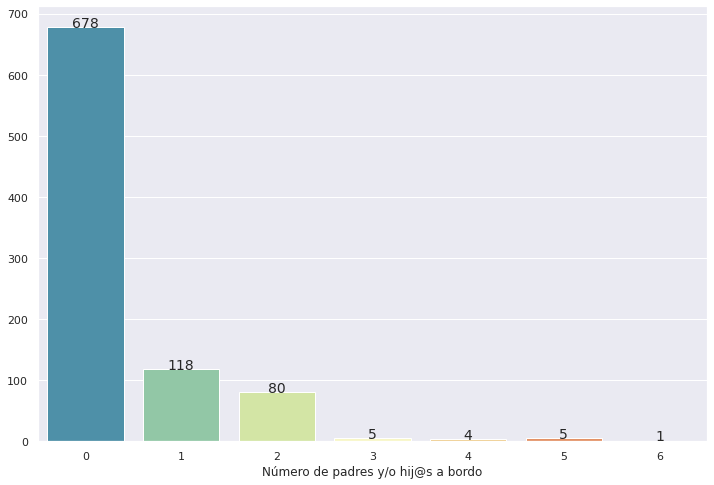

In [29]:
# Gráfico de par_ch

plt.figure(figsize=(12,8))
g = sns.countplot(x = 'par_ch', data=train, palette='Spectral_r')
g.set_xlabel('Número de padres y/o hij@s a bordo')
g.set_ylabel('')
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

La mayoria de la gente a bordo del Titanic iba sin padres y/o hijas/os a bordo, como se vió en el gráfico de hermanas/os y parejas, habían pocas familias numerosas.

Text(0, 0.5, '')

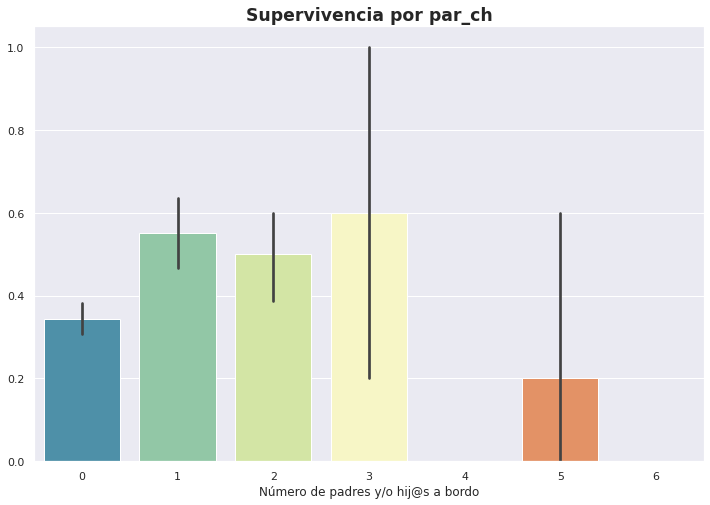

In [30]:
# Gráfica de supervivencia por par_ch

plt.figure(figsize=(12,8))
g = sns.barplot(x='par_ch', y='survived', data=train, palette='Spectral_r')
g.set_title('Supervivencia por par_ch',fontsize='x-large', 
               fontweight='bold')
g.set_xlabel('Número de padres y/o hij@s a bordo')
g.set_ylabel('')

Quienes iban a bordo con de 1 a 3 padres y/o hijas/os fueron los grupos de personas con mayor porcentaje de supervivencia. Por otra parte,quienes iban con 4 o 6 no sobrevivieron.

#### fare


Se tiene el siguiente histograma para ver la distribución de la variable fare:

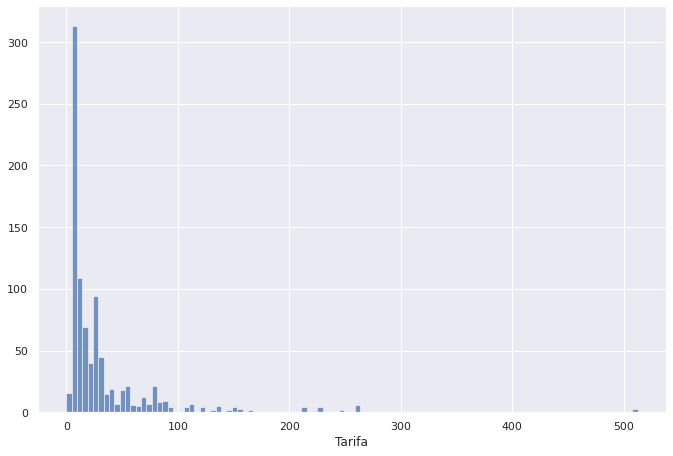

In [31]:
# Gráfico de feature fare

g = sns.displot(x='fare', data=train, aspect=1.5, height=6.5)
g.set_axis_labels('Tarifa','')

En la gráfica se observa un sesgo a la derecha, es decir, los datos están concentrados del lado izquierdo del eje x, lo cual indica que el costo del boleto (fare) tendía a ser "bajo". Se puede decir que la mayor parte de los boletos se encuentran dentro del rango de 0 a 50 dólares. Asimismo de esta forma es más evidente la existencia de datos atipicos, en especial esos boletos que estan por arriba de los 500 dólares.

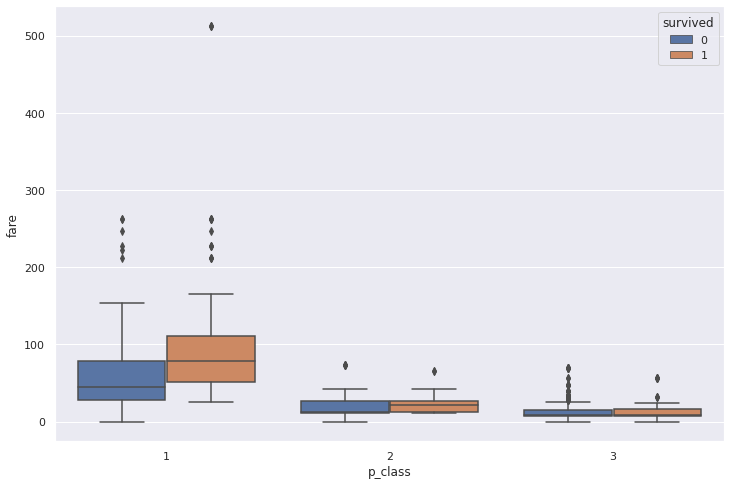

In [32]:
# Gráfico boxplot de feature fare
 
plt.figure(figsize=(12,8))
g = sns.boxplot(x='p_class',y='fare',data=train, hue='survived')

Al realizar gráficos de caja y bigote de la variable fare para cada una de las clases según si sobrevivieron o no, resulta más sencillo identificar los datos atípicos. La clase 2 es la que menores datos atípicos tiene, mientras que la clase 1 es la que tiene un mayor rango de datos atípicos. Es en esta clase donde varias personas compraron un boleto de más de 500 dólares y sorprendentemente sobrevivieron todas ellas. 

Es interesante notar que las cajas correspondientes a la gente de la clase 1 se encuentran desfasadas. La media de la tarifa que pagó la gente que sobrevivió de la clase 1 está por arriba de quienes no sobrevivieron dentro de la misma clase. Esto indica que, por lo menos en la primera clase, el pagar una mayor tarifa elevaba la probabilidad de sobrevivir.

#### embarked

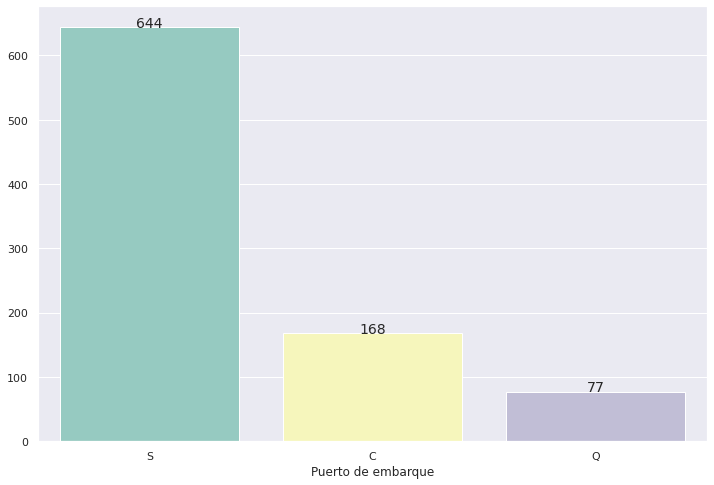

In [33]:
# Gráfico de feature embarked

plt.figure(figsize=(12,8))
g = sns.countplot(x = 'embarked', data=train, palette='Set3')
g.set_xlabel('Puerto de embarque')
g.set_ylabel('')
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, \
                    p.get_height()+0.1), ha='center', size=14)

Más de la mitad de pasajeros y pasajeras abordaron el Titanic en el puerto S, seguido del puerto C y el Q.

Text(0, 0.5, '')

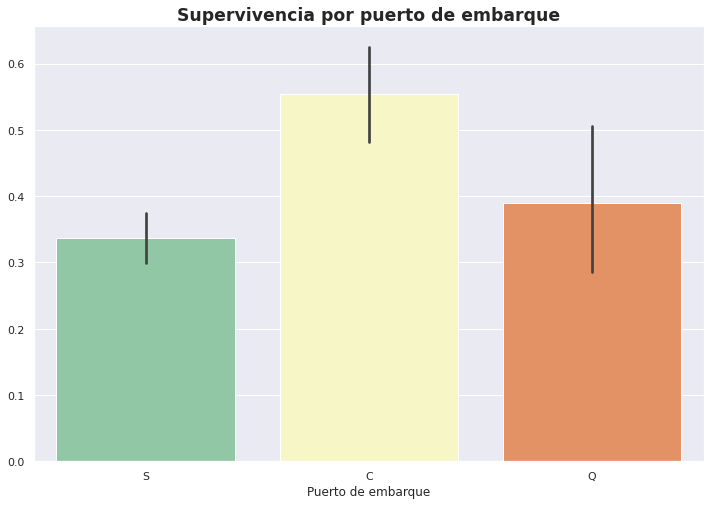

In [34]:
# Gráfico de supervivencia por embarked

plt.figure(figsize=(12,8))
g = sns.barplot(x='embarked', y='survived', data=train, palette='Spectral_r')
g.set_title('Supervivencia por puerto de embarque',fontsize='x-large', 
               fontweight='bold')
g.set_xlabel('Puerto de embarque')
g.set_ylabel('')

La proporción de gente que sobrevivió fue mayor para gente que abordó en el puerto C mientras que quienes abordaron en el puerto S son quienes tuvieron la menor proporción de supervivientes. Incluso así las personas que sobrevivieron y abordaron en el puerto S suman más que los supervivientes de los otros dos puertos juntos.

In [35]:
train.groupby('embarked')['survived'].value_counts()

embarked  survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: survived, dtype: int64

### cabin

In [36]:
# Extracción de feature puerta

data = train.append(test)

In [37]:
data['gate'] = data.cabin.str.slice(stop=1)
data.groupby(['p_class', 'survived'])['gate'].value_counts()

p_class  survived  gate
1        0.0       C       24
                   B       12
                   A        8
                   D        7
                   E        7
                   T        1
         1.0       B       35
                   C       35
                   D       22
                   E       18
                   A        7
2        0.0       D        1
                   E        1
                   F        1
         1.0       F        7
                   D        3
                   E        3
3        0.0       F        4
                   G        2
         1.0       E        3
                   G        2
                   F        1
Name: gate, dtype: int64

Se puede observar que aunque sean pocos datos nos dan información importante. La mayoría de las cabinas conocidas son de primera clase y de personas que sobrevivieron. Tambien se puede ver que las puertas A y B eran exclusivas para la primera clase

---

## Limpieza de datos

### name

In [38]:
# Extracción de feature title

data['title'] = data.name.str.extract('([A-Za-z]+)\.', expand=False)
data.groupby('sex')['title'].value_counts()

sex     title   
female  Miss        260
        Mrs         197
        Mlle          2
        Ms            2
        Countess      1
        Dona          1
        Dr            1
        Lady          1
        Mme           1
male    Mr          757
        Master       61
        Rev           8
        Dr            7
        Col           4
        Major         2
        Capt          1
        Don           1
        Jonkheer      1
        Sir           1
Name: title, dtype: int64

La mayoría tienen el título de Miss, Mrs, Mr o Master. Entonces usaremos estos 4 para codificar los títulos después

In [39]:
# Reemplazar títulos poco usuales para el modelo

data['title'].replace(['Mlle','Ms'],'Miss', inplace=True)
data['title'].replace(['Countess','Dona','Mme','Lady'],'Mrs', inplace=True)
data['title'].replace(['Rev','Col','Major','Capt','Don','Jonkheer','Sir'], 'Mr', inplace=True)

# Hay una mujer que tiene el título de Dr
mask_uno = data['title']=='Dr' 
mask_dos = data['sex']=='male'
mask_tres = data['sex']=='female'
data['title'].mask(mask_uno & mask_dos, 'Mr', inplace=True)
data['title'].mask(mask_uno & mask_tres, 'Mrs', inplace=True)

In [40]:
data.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

¡Listo! Ahora tenemos los títulos más comúnes. Otra manera de resolver el problema de títulos raros es juntar todos en una misma categoría.

In [41]:
# Separar los datasets para que no haya sesgo en el modelo

train = data.iloc[:891,:] 
test = data.iloc[892:,:]

### age

In [42]:
# Llenaremos los NaN de age con el promedio de los títulos que tienen.

edad_por_titulo = train.groupby('title')['age'].mean()
edad_por_titulo

title
Master     4.574167
Miss      21.845638
Mr        32.984412
Mrs       35.991071
Name: age, dtype: float64

In [43]:
for titulo in edad_por_titulo.index:
    train.loc[(train['age'].isna()) & (train['title']==titulo),'age'] = edad_por_titulo[titulo]
    test.loc[(test['age'].isna()) & (test['title']==titulo),'age'] = edad_por_titulo[titulo]


[Text(0, 0.5, 'Edad'), Text(0.5, 0, 'Título')]

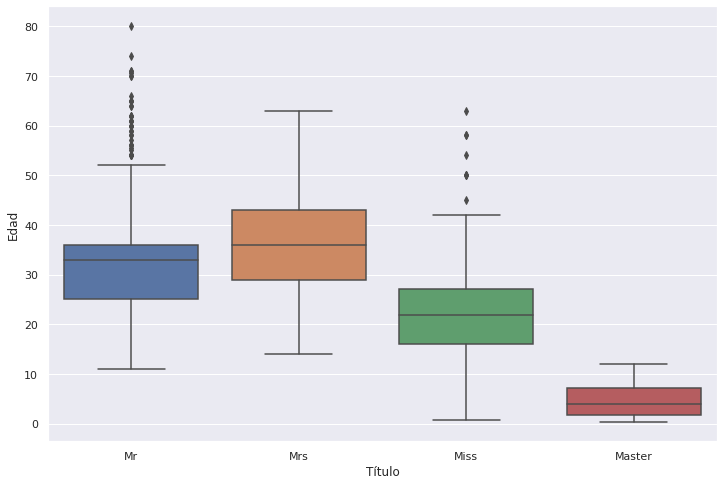

In [44]:
# Gráfica de Edades por Título

plt.figure(figsize=(12,8))
g = sns.boxplot(x='title', y='age', data=train)
g.set(xlabel='Título', ylabel='Edad')

Mr es el título más común por lo que no es de sorprender que tenga demasiados outliers. Para este estudio no nos preocuparemos mucho por ellos.

### embarked

In [45]:
train['embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object

In [46]:
# Puerto más común
top = 'S'
train.embarked.fillna(top, inplace=True)

### fare

In [47]:
# Se llenan los valores nulos de fare con el promedio

test['fare'].fillna(test['fare'].mean(), inplace=True)

In [48]:
# ¿Recuerdas los valores atípicos de la tarifa? 

train['fare'].sort_values(ascending=False).head()

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
Name: fare, dtype: float64

Es distintas maneras de tratar con estos, pero en este caso los reemplazaremos por la media

In [49]:
train.loc[train['fare'] == 512.3292,'fare'] = train['fare'].median()

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    float64
 2   p_class       891 non-null    int64  
 3   name          891 non-null    object 
 4   sex           891 non-null    object 
 5   age           891 non-null    float64
 6   sib_sp        891 non-null    int64  
 7   par_ch        891 non-null    int64  
 8   fare          891 non-null    float64
 9   cabin         204 non-null    object 
 10  embarked      891 non-null    object 
 11  gate          204 non-null    object 
 12  title         891 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 137.5+ KB


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 1 to 417
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  417 non-null    int64  
 1   survived      0 non-null      float64
 2   p_class       417 non-null    int64  
 3   name          417 non-null    object 
 4   sex           417 non-null    object 
 5   age           417 non-null    float64
 6   sib_sp        417 non-null    int64  
 7   par_ch        417 non-null    int64  
 8   fare          417 non-null    float64
 9   cabin         91 non-null     object 
 10  embarked      417 non-null    object 
 11  gate          91 non-null     object 
 12  title         417 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 45.6+ KB


In [52]:
test.drop('survived', axis=1, inplace=True)

---

## Transformación de datos

Ahora se tienen que convertir los datos a números enteros para hacer el modelo de ML

### sex

In [53]:
generos = {'male': 0, 'female':1}
data = [train,test]
for dataset in data:
    dataset['sex'] = dataset['sex'].map(generos).astype('int')

### age


In [54]:
# Se utiliza la función qcut para discretizar datos continuos

train['age'] = pd.qcut(train['age'],5)
test['age'] = pd.qcut(test['age'],5)

[Text(0, 0.5, ''), Text(0.5, 0, 'Rango de edades')]

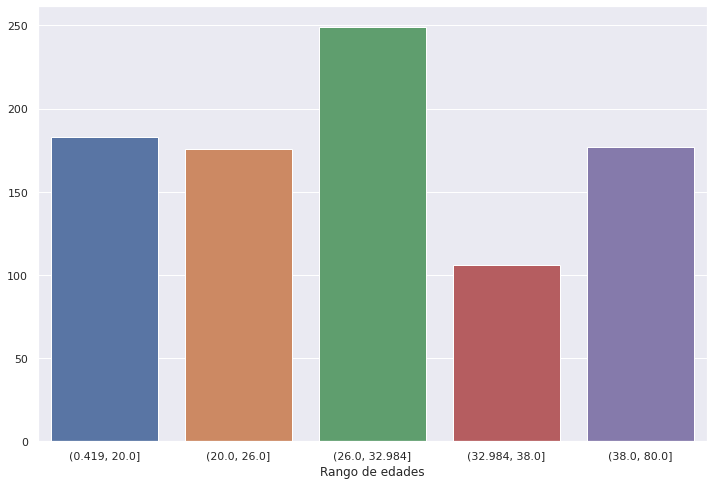

In [55]:
# Gráfico de feature age discretizado

plt.figure(figsize=(12,8))
g = sns.countplot(x='age', data=train)
g.set(xlabel='Rango de edades', ylabel='')

### fare

In [56]:
# Se utiliza la función qcut para discretizar datos continuos

train['fare'] = pd.qcut(train['fare'], 5)
test['fare'] = pd.qcut(test['fare'], 5)

[Text(0, 0.5, ''), Text(0.5, 0, 'Rango de tarifa')]

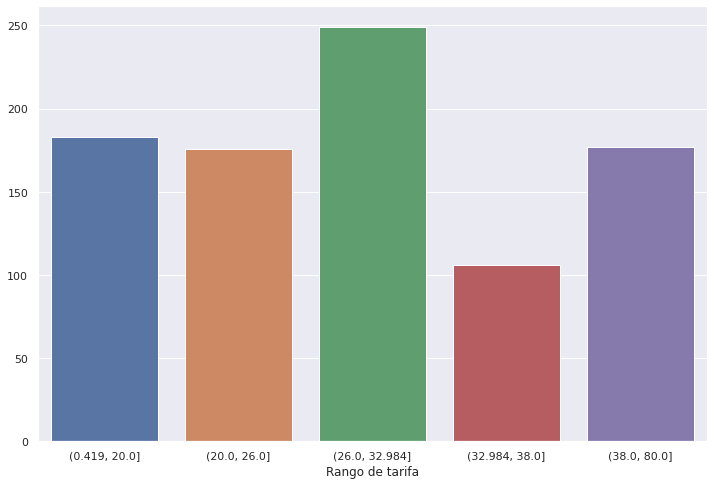

In [57]:
# Gráfico de feature fare discretizado

plt.figure(figsize=(12,8))
g = sns.countplot(x='age', data=train)
g.set(xlabel='Rango de tarifa', ylabel='')

### embarked

In [58]:
ciudad = {'S':0, 'C':1, 'Q':2}
train['embarked'] = train['embarked'].map(ciudad).astype('int')
test['embarked'] = test['embarked'].map(ciudad).astype('int')

### title

In [59]:
titles = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3}
train['title'] = train['title'].map(titles).astype('int')
test['title'] = test['title'].map(titles).astype('int')

Para codificar las features age y fare utilizaremos Label Encoder.

In [60]:
# Nos servira para identificar el número alrango que esta asociado después

print(train['age'].unique())
print(train['fare'].unique())

[(20.0, 26.0], (32.984, 38.0], (26.0, 32.984], (38.0, 80.0], (0.419, 20.0]]
Categories (5, interval[float64]): [(0.419, 20.0] < (20.0, 26.0] < (26.0, 32.984] < (32.984, 38.0] <
                                    (38.0, 80.0]]
[(-0.001, 7.854], (39.688, 263.0], (7.854, 10.5], (10.5, 21.075], (21.075, 39.688]]
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.075] <
                                    (21.075, 39.688] < (39.688, 263.0]]


In [61]:
label =LabelEncoder()
train['age'] = label.fit_transform(train['age'])
test['age'] = label.fit_transform(test['age'])

In [62]:
label =LabelEncoder()
train['fare'] = label.fit_transform(train['fare'])
test['fare'] = label.fit_transform(test['fare'])

In [63]:
print(train['age'].unique())
print(train['fare'].unique())

[1 3 2 4 0]
[0 4 1 2 3]


### gate

In [64]:
train.gate.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [65]:
puerta = {"T": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
train.loc[train.gate.isna(), 'gate'] = 'T'
test.loc[test.gate.isna(), 'gate'] = 'T'
train['gate'] = train['gate'].map(puerta).astype('int')
test['gate'] = test['gate'].map(puerta).astype('int')

Ahora ya estan codificadas nuestros datos. Hasta este punto se encuentra lo que hemos visto en el curso. Implementaremos a continuación el modelo de ML únicamente con el algoritmo de Random Tree para obtener un visteza a nuestro trabajo

---

## Selección de features

In [66]:
# Dropearemos los features que ya no nos sirven y dividiremos el dataset train
# para identificar las columnas que tienen mayor importancia
X_train = train.drop(['passenger_id', 'survived', 'name', 'cabin'], axis=1)

y_train = train['survived']

In [67]:
model = RandomForestClassifier(n_estimators=200, random_state=2)

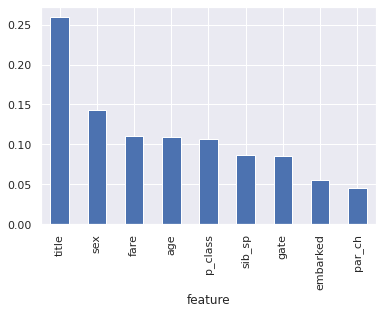

In [68]:
model.fit(X_train,y_train)
importance = pd.DataFrame({'feature': X_train.columns, 'importance': \
                           np.round(model.feature_importances_,3)})
importance = importance.sort_values('importance', ascending = False).set_index('feature')

importance.plot(kind='bar', rot=90, legend=False)

Tendremos que elegir las cinco columnas con mayor importancia para no tener tanto ruido

In [69]:
col_finales = ['title', 'sex', 'fare', 'age', 'p_class']

---

## Modelo

In [70]:
# Usaremos Random Forest

X_train = X_train[col_finales]
X_test = test[col_finales]

In [71]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
 
Y_prediction = random_forest.predict(X_test)
 
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

85.52

In [72]:
# Usamos cross_val

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Resultados:", scores)
print("Promedio:", scores.mean())
print("Desviación estándar:", scores.std())

Resultados: [0.76666667 0.83146067 0.73033708 0.80898876 0.85393258 0.85393258
 0.84269663 0.79775281 0.88764045 0.82022472]
Promedio: 0.8193632958801498
Desviación estándar: 0.04361263611850429


Nuestro modelo tiene un promedio de precisión de 81% con un std de 4%. No es malo para el estudio que hicimos de estos datasets.

Ahora que ya analizamos información de más de 1000 personas sería entretenido saber si sobreviviriamos nosotros al hundimiento del Titanic.

In [73]:
X_train.head()

,title,sex,fare,age,p_class
0,0,0,0,1,3
1,2,1,4,3,1
2,1,1,1,1,3
3,2,1,4,3,1
4,0,0,1,3,3


In [74]:
# En orden de lista: Emiliano, Naila, Paulo
# Emiliano {'title': Mr, 'sex': male, 'fare': 52, 'age': 19, 'p_class': 1}
# Naila {'title': Miss, 'sex': female, 'fare': 7, 'age': 24, 'p_class': 2}
# Paulo {'title': Mr, 'sex': male, 'fare': 29, 'age': 24, 'p_class': 1}
 
our_survival = [[0, 0, 0, 4, 1], [1, 1, 0, 1, 2], [0, 0, 3, 1, 1]]
 
pred = random_forest.predict(our_survival)
print(pred)

[0. 1. 1.]


Para recordar

titles = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3}

sex = {'male': 0, 'female':1}

age(0-20) = 0 ; age(20-26) = 1

fare(0-8) = 0 ; fare(8-10.5) = 1 ; fare(10.5-21) = 2 ; fare(21-39) = 3 ; fare(39-263) = 4 ;